# 771763 - Understanding Artificial Intelligence

## Assessment coding components 1 
***

# Component 1- Artificial Neural Network

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('results-2022-cefas-website.csv')

In [3]:
df.head()

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Sample number,Production area,Bed ID,Local authority,Grid,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,22-Jan,Conwy,B044V,Conwy CBC,SH76317972,Conwy West,1/5/2022,"Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment"
2,22-Feb,Lantivet Bay,B70AH,Cornwall PHA,SX16305094,Sandheap Point,1/5/2022,ND,ND,ND,ND,ND,ND,ND
3,22-Mar,Mevagissey Bay,B70AK,Cornwall PHA,SX05214698,South Mevagissey Bottom,1/5/2022,ND,ND,ND,ND,ND,ND,ND
4,22-Apr,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,1/5/2022,ND,ND,ND,ND,ND,ND,ND


In [4]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df[:107]


In [5]:
df.head()

,Sample number,Production area,Bed ID,Local authority,Grid,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,22-Jan,Conwy,B044V,Conwy CBC,SH76317972,Conwy West,1/5/2022,"Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment"
2,22-Feb,Lantivet Bay,B70AH,Cornwall PHA,SX16305094,Sandheap Point,1/5/2022,ND,ND,ND,ND,ND,ND,ND
3,22-Mar,Mevagissey Bay,B70AK,Cornwall PHA,SX05214698,South Mevagissey Bottom,1/5/2022,ND,ND,ND,ND,ND,ND,ND
4,22-Apr,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,1/5/2022,ND,ND,ND,ND,ND,ND,ND
5,22-May,Porlock Relay,B094E,Somerset West and Taunton Council,SS87184778,Porlock Relay,1/5/2022,ND,ND,ND,ND,ND,ND,ND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 1 to 107
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Sample number                                       106 non-null    object
 1   Production area                                     106 non-null    object
 2   Bed ID                                              106 non-null    object
 3   Local authority                                     106 non-null    object
 4   Grid                                                106 non-null    object
 5   Sampling point                                      106 non-null    object
 6   Date sample collected                               106 non-null    object
 7   Alexandrium spp. 
cells L-1
(PSP)                   106 non-null    object
 8   Dinophysiaceae 
cells L-1
(DSP)                     105 non-null    object
 9   Prorocentr

In [5]:
df.isnull().sum()

0
Sample number                                           1
Production area                                         1
Bed ID                                                  1
Local authority                                         1
Grid                                                    1
Sampling point                                          1
Date sample collected                                   1
Alexandrium spp. \ncells L-1\n(PSP)                     1
Dinophysiaceae \ncells L-1\n(DSP)                       2
Prorocentrum lima \ncells L-1\n(DSP)                    2
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                2
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)        2
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)     2
Prorocentrum cordatum \ncells L-1\n(Venerupin)          2
dtype: int64

In [6]:
def clean_data(col):
    df[col] = df[col].replace('ND', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col]= df[col].fillna(-1)


    return df[col]
    
cols = ['Alexandrium spp. \ncells L-1\n(PSP)', 'Dinophysiaceae \ncells L-1\n(DSP)', 'Prorocentrum lima \ncells L-1\n(DSP)', 'Pseudo-nitzschia spp. \ncells L-1\n(ASP) ']

In [7]:
for col in cols:
    clean_data(col)

In [8]:
df

,Sample number,Production area,Bed ID,Local authority,Grid,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,22-Jan,Conwy,B044V,Conwy CBC,SH76317972,Conwy West,1/5/2022,-1.0,-1.0,-1.0,-1.0,"Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment"
2,22-Feb,Lantivet Bay,B70AH,Cornwall PHA,SX16305094,Sandheap Point,1/5/2022,0.0,0.0,0.0,0.0,ND,ND,ND
3,22-Mar,Mevagissey Bay,B70AK,Cornwall PHA,SX05214698,South Mevagissey Bottom,1/5/2022,0.0,0.0,0.0,0.0,ND,ND,ND
4,22-Apr,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,1/5/2022,0.0,0.0,0.0,0.0,ND,ND,ND
5,22-May,Porlock Relay,B094E,Somerset West and Taunton Council,SS87184778,Porlock Relay,1/5/2022,0.0,0.0,0.0,0.0,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,106/22,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,2/22/2022,0.0,0.0,0.0,0.0,ND,ND,ND
104,107/22,Blakeney,B006R,North Norfolk DC,TF91804549,Wells - The Pool,2/22/2022,0.0,0.0,0.0,0.0,ND,ND,ND
105,108/22,Helford,B034W,Cornwall PHA,SW75462765,Porth Navas Quay,2/23/2022,0.0,0.0,0.0,0.0,ND,ND,ND
106,109/22,Lune,BO66Z,Wyre BC,SD34194862,Knott Spit,2/23/2022,-1.0,-1.0,-1.0,-1.0,"Unable to analyse, too much sediment","Unable to analyse, too much sediment","Unable to analyse, too much sediment"


In [9]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}
#thresholds = [40, 100, 100, 150000]

In [10]:
def check_thresholds(df):
    t = []
    for i in range(0, 107):
        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"] 
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]

        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1 
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
             threshold_reached = 1 

        t.append(threshold_reached)
       
    return t

link to check_thresholds code source can be found on page 4 [here][]

[here]:https://canvas.hull.ac.uk/courses/61140#:~:text=%5BLab%202%5D%20Neural%20networks.pdf

In [11]:
thresholds_reached = check_thresholds(df)

In [12]:
df['thresholds_reached'] = thresholds_reached
pd.DataFrame.to_csv(df, 'thresholds_cleaned.csv', sep=',', index=False)

In [13]:
# import keras
from tensorflow.keras import Sequential
# from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout
# from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

Using TensorFlow backend.


In [14]:
x =  pd.read_csv('thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])
y = pd.read_csv('thresholds_cleaned.csv', usecols=["thresholds_reached"])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## 1st model architecture

In [16]:
# Initialize model
model = Sequential()
model.add(Dense(units=40, activation='relu', input_shape=(4,)))
model.add(Dropout(0.9))

model.add(Dense(units= 30, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units= 30, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units= 20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=13, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()
model.compile(loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                200       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                6

In [17]:
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
6/6 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.8941 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9059 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9059 - val_loss: 0.0000e+00 - val_accuracy: 0.8636
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9647 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9765 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9765 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9529 - val_loss: 0.0000e+00 

#### Visualizing the performance metrics of the model

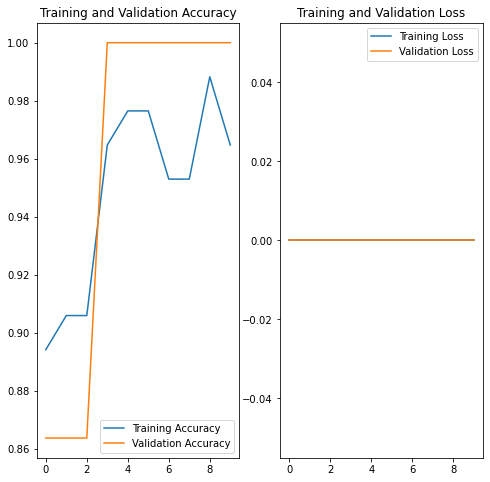

In [18]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs) 

# Define a function to plot the metrics of a model's performance
def plot_acc_loss():
    plt.figure(figsize=(8, 8))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
#visualize model's performance metrics
plot_acc_loss()

## 2nd model architecture

In [19]:
model2 = Sequential()

model2.add(Dense(units= 20, activation='relu', input_shape=(4,)))
model2.add(Dropout(0.2))

model2.add(Dense(units=13, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1, activation='sigmoid'))


model2.summary()
model2.compile(loss='binary_crossentropy',
optimizer='Adam',
metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                100       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 13)                273       
_________________________________________________________________
dropout_6 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 14        
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model2.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
6/6 [==============================] - 0s 27ms/step - loss: 6.0197 - accuracy: 0.8588 - val_loss: 18.8218 - val_accuracy: 0.8636
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 3.7727 - accuracy: 0.9059 - val_loss: 13.8542 - val_accuracy: 0.8636
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 2.9046 - accuracy: 0.9294 - val_loss: 9.1438 - val_accuracy: 0.8636
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 1.6558 - accuracy: 0.9529 - val_loss: 4.9083 - val_accuracy: 0.8636
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 1.6265 - accuracy: 0.9059 - val_loss: 0.6187 - val_accuracy: 0.9545
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 1.1463 - accuracy: 0.9294 - val_loss: 0.5142 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.7260 - accuracy: 0.9765 - val_loss: 0.5019 - val_accuracy: 1.0000
Epoch 8/10
6/6 [===============

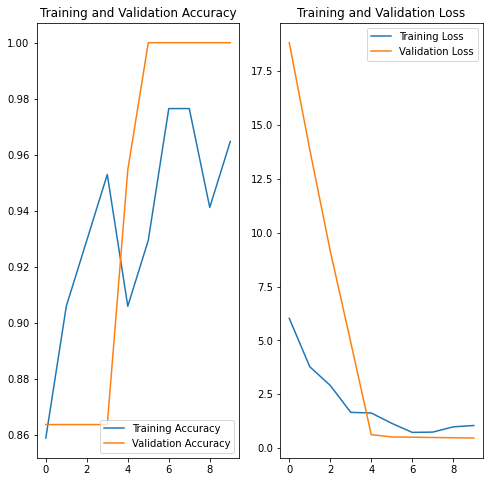

In [21]:
#visualize model's performance metrics
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

## 3rd model architecture

In [22]:
model3 = Sequential()
model3.add(Dense(units=45, activation='relu', input_shape=(4,)))
model3.add(Dropout(0.3))

model3.add(Dense(units= 20, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(units=13, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(units=1, activation='sigmoid'))


model3.summary()
model3.compile(loss='binary_crossentropy',
optimizer='Adam',
metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 45)                225       
_________________________________________________________________
dropout_7 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                920       
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 13)                273       
_________________________________________________________________
dropout_9 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [23]:
history = model3.fit(x_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(x_test, y_test)) 
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/40
6/6 [==============================] - 1s 27ms/step - loss: 2.0132 - accuracy: 0.9647 - val_loss: 0.5620 - val_accuracy: 1.0000
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 1.6964 - accuracy: 0.9647 - val_loss: 0.5386 - val_accuracy: 1.0000
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.9882 - val_loss: 0.5154 - val_accuracy: 1.0000
Epoch 4/40
6/6 [==============================] - 0s 5ms/step - loss: 1.0565 - accuracy: 0.9765 - val_loss: 0.4920 - val_accuracy: 1.0000
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 0.4958 - accuracy: 1.0000 - val_loss: 0.4682 - val_accuracy: 1.0000
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 1.0100 - accuracy: 0.9647 - val_loss: 0.4429 - val_accuracy: 1.0000
Epoch 7/40
6/6 [==============================] - 0s 5ms/step - loss: 0.4470 - accuracy: 1.0000 - val_loss: 0.4182 - val_accuracy: 1.0000
Epoch 8/40
6/6 [=================

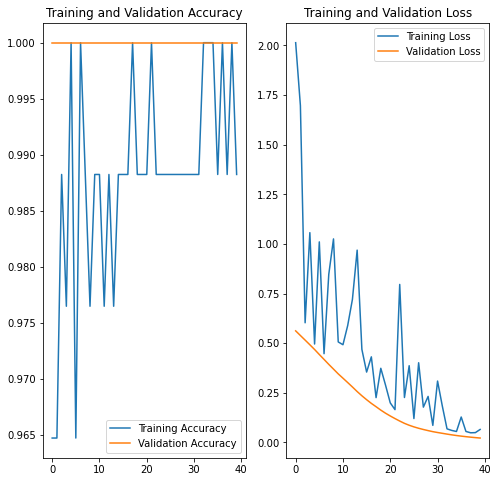

In [24]:
#visualize model's performance metrics
epochs = 40
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

## Model with RMSProp optimizer

In [25]:
model.compile(loss='categorical_crossentropy',
optimizer='RMSProp',
metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/10
6/6 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.9765 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9882 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9882 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9882 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9882 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9882 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - 0s 7ms/step - loss: 0.0000e

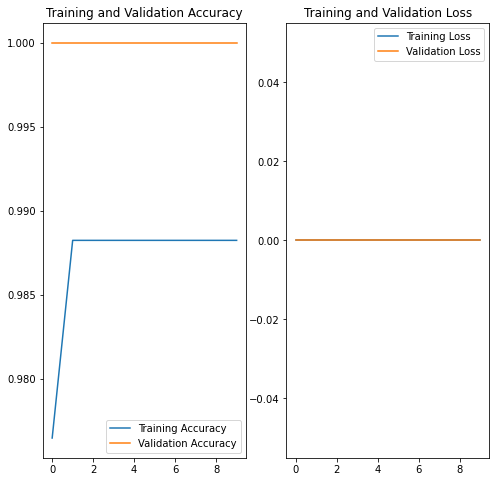

In [26]:
#visualize model's performance metrics
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

In [27]:
model2.compile(loss='binary_crossentropy',
optimizer='RMSProp',
metrics=['accuracy'])

history = model2.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/10
6/6 [==============================] - 1s 20ms/step - loss: 0.5547 - accuracy: 0.9647 - val_loss: 0.4339 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6035 - accuracy: 0.9647 - val_loss: 0.4162 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.5735 - accuracy: 0.9765 - val_loss: 0.4018 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 0.7911 - accuracy: 0.9647 - val_loss: 0.3891 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.4956 - accuracy: 0.9882 - val_loss: 0.3766 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 0.3900 - accuracy: 1.0000 - val_loss: 0.3644 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.3749 - accuracy: 1.0000 - val_loss: 0.3531 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=================

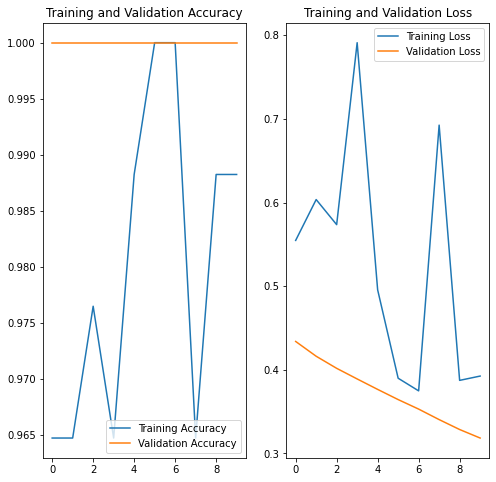

In [28]:
#visualize model's performance metrics
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

In [29]:
model3.compile(loss='binary_crossentropy',
optimizer='RMSProp',
metrics=['accuracy'])

history = model3.fit(x_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(x_test, y_test)) 
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/40
6/6 [==============================] - 1s 23ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 0.1624 - accuracy: 0.9882 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 0.2032 - accuracy: 0.9882 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 8/40
6/6 [=================

checking my model's performance against the majority baseline 

In [31]:
predictions = np.zeros(len(x_test))

new_score = model.evaluate(x_test, predictions, verbose=0)
print('Test loss:', new_score[0])
print('Test accuracy:', new_score[1])


Test loss: 0.0
Test accuracy: 1.0


 model.predict(
    x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)